In [1]:
import os
import cv2
import numpy as np

# Resim boyutlarını belirleyin
image_width = 224
image_height = 224

# Sınıf adlarını belirleyin
classes = ['cars', 'planes']


In [2]:
# Resimleri yüklemek için bir fonksiyon yazalım
def load_data(inputBasePath):
    X = []  # Resimleri (girdileri) tutacak liste
    Y = []  # Etiketleri (sınıfları) tutacak liste

    # Her bir sınıf için işlem yapalım
    for i, class1 in enumerate(classes):
        class_path = os.path.join(inputBasePath, class1)
        print(f'=> {class1}')  # Şu anda hangi sınıfta olduğumuzu yazdır

        # Sınıf klasöründeki her resim için işlem yapalım
        for file in os.listdir(class_path):
            file_path = os.path.join(class_path, file)
            img = cv2.imread(file_path)  # Resmi okuma
            img = cv2.resize(img, (image_width, image_height))  # Resmi yeniden boyutlandırma
            X.append(img)  # Resmi X listesine ekleme
            Y.append(i)  # Etiketi Y listesine ekleme (0:cars, 1:planes)

    # Listeyi numpy array'e dönüştürme
    X = np.array(X)
    Y = np.array(Y)

    return X, Y

# Resimleri ve etiketleri yükle
inputBasePath = r"C:\Users\Administrator\Desktop\talha_kaya_221120241013\images"
X, Y = load_data(inputBasePath)

# Verilerin boyutunu kontrol edelim
print(f"X : {X.shape}")
print(f"Y : {Y.shape}")

=> cars
=> planes
X : (700, 224, 224, 3)
Y : (700,)


In [3]:
# Veriyi numpy dosyasına kaydedelim
outputBasePath = r"C:\Users\Administrator\Desktop\talha_kaya_221120241013\imagearrays"
np.save(os.path.join(outputBasePath, '224x224_images.npy'), X)
np.save(os.path.join(outputBasePath, '224x224_labels.npy'), Y)

print("[ INFO ] Numpy array dosyaları kaydedildi.")

[ INFO ] Numpy array dosyaları kaydedildi.


In [4]:
from sklearn.model_selection import train_test_split

# Eğitim ve test verilerini ayıralım
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"Y_train: {Y_train.shape}")
print(f"Y_test: {Y_test.shape}")


X_train: (560, 224, 224, 3)
X_test: (140, 224, 224, 3)
Y_train: (560,)
Y_test: (140,)


In [5]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Resim boyutlarını tanımla
image_width, image_height = 224, 224

# Modeli oluşturma
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_width, image_height, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # 2 sınıf olduğu için sigmoid kullanıyoruz
])

# Modeli derleme
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Modelin özetini görüntüle
model.summary()


c:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 173056)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    11,075,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,132,033 (42.47 MB)

 Trainable params: 11,132,033 (42.47 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split

# Verileri yükleme
X = np.load(r"C:\Users\Administrator\Desktop\talha_kaya_221120241013\imagearrays\224x224_images.npy")
Y = np.load(r"C:\Users\Administrator\Desktop\talha_kaya_221120241013\imagearrays\224x224_labels.npy")

# Veriyi 0-1 aralığına normalleştirme
X = X / 255.0

# Veriyi eğitim ve test olarak ayırma (80% eğitim, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f"X_train şekli: {X_train.shape}")
print(f"Y_train şekli: {Y_train.shape}")
print(f"X_test şekli: {X_test.shape}")
print(f"Y_test şekli: {Y_test.shape}")

# Modeli eğitme
history = model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_test, Y_test))

# Eğitim sırasında kaydedilen başarı ve kayıp değerlerini yazdırma
print(f"Model Eğitimi Sonuçları: {history.history}")


X_train şekli: (560, 224, 224, 3)
Y_train şekli: (560,)
X_test şekli: (140, 224, 224, 3)
Y_test şekli: (140,)
Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 444ms/step - accuracy: 0.5578 - loss: 1.2200 - val_accuracy: 0.9286 - val_loss: 0.2267
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 418ms/step - accuracy: 0.9121 - loss: 0.2183 - val_accuracy: 0.9500 - val_loss: 0.1411
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 430ms/step - accuracy: 0.9674 - loss: 0.1070 - val_accuracy: 0.9571 - val_loss: 0.1015
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 423ms/step - accuracy: 0.9964 - loss: 0.0279 - val_accuracy: 0.9500 - val_loss: 0.1051
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 428ms/step - accuracy: 1.0000 - loss: 0.0116 - val_accuracy: 0.9571 - val_loss: 0.1021
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 427ms/step - accuracy: 0.9982 - loss: 0.0095 - val_accuracy: 0.9571 - val_loss: 0.0957
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 423ms/step - accuracy: 1.0000 - loss: 0.0034 - val_accuracy: 0.9571 - val_loss: 0

In [8]:
# Modeli test verisiyle değerlendirelim
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print(f"Test kaybı: {test_loss}")
print(f"Test doğruluğu: {test_acc}")

5/5 - 0s - 86ms/step - accuracy: 0.9500 - loss: 0.1233
Test kaybı: 0.1233057826757431
Test doğruluğu: 0.949999988079071


In [9]:
model.save('car_plane_model.h5')

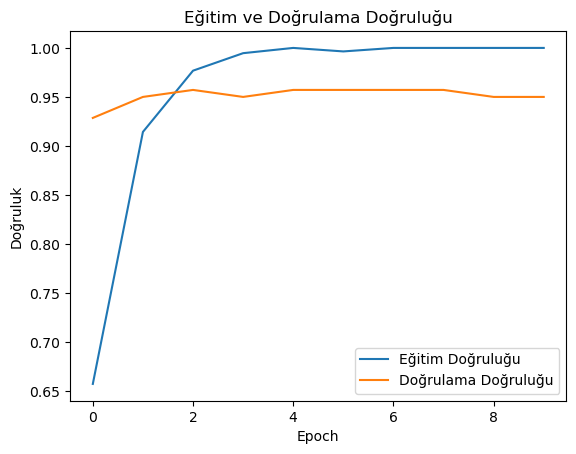

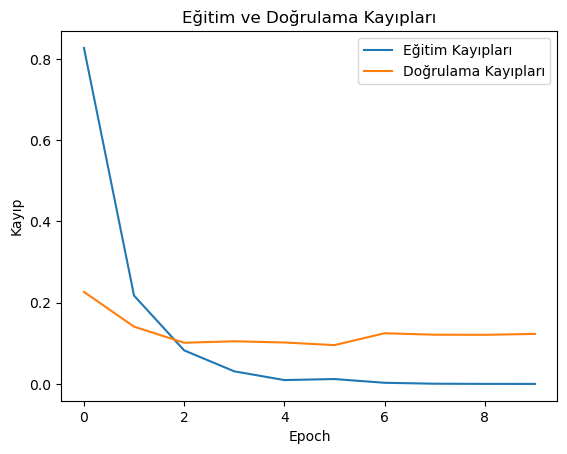

In [10]:
import matplotlib.pyplot as plt

# Eğitim ve doğrulama doğruluğunu görselleştirme
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend(loc='lower right')
plt.show()

# Eğitim ve doğrulama kaybını görselleştirme
plt.plot(history.history['loss'], label='Eğitim Kayıpları')
plt.plot(history.history['val_loss'], label='Doğrulama Kayıpları')
plt.title('Eğitim ve Doğrulama Kayıpları')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend(loc='upper right')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Resim 1:
Gerçek Etiket: 0
Tahmin Edilen Etiket: cars
-----


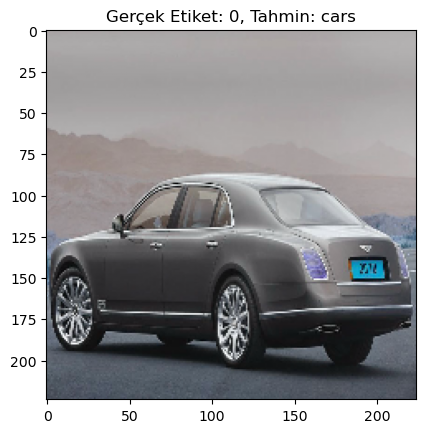

Resim 2:
Gerçek Etiket: 1
Tahmin Edilen Etiket: planes
-----


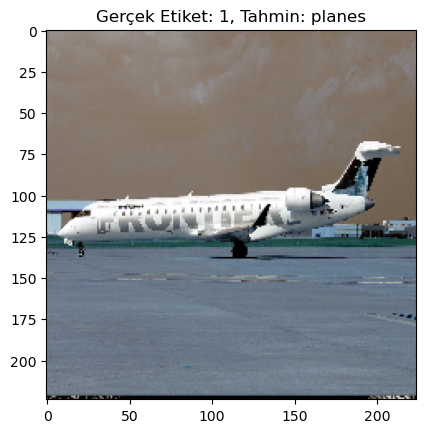

Resim 3:
Gerçek Etiket: 1
Tahmin Edilen Etiket: planes
-----


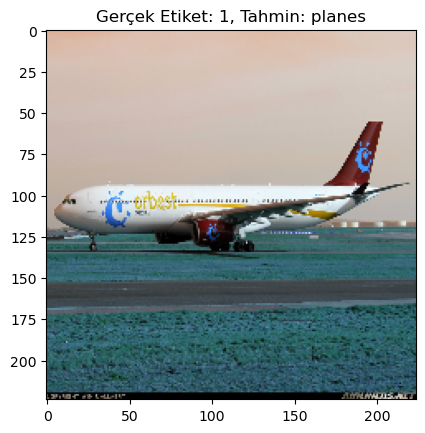

Resim 4:
Gerçek Etiket: 0
Tahmin Edilen Etiket: cars
-----


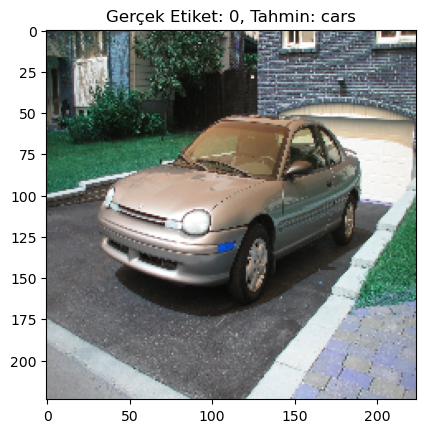

Resim 5:
Gerçek Etiket: 0
Tahmin Edilen Etiket: cars
-----


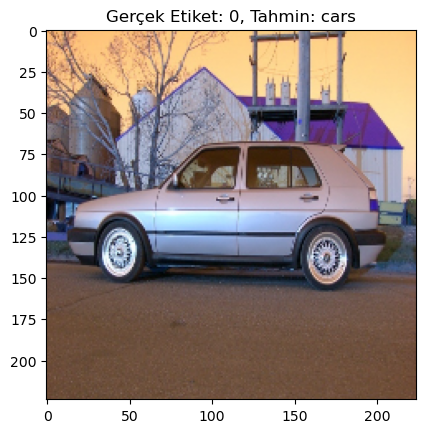

In [11]:
import numpy as np

# İlk 5 test örneği için tahmin yapalım
predictions = model.predict(X_test[:5])

# Tahminleri ve gerçek etiketleri yazdıralım
for i in range(5):
    print(f"Resim {i+1}:")
    print(f"Gerçek Etiket: {Y_test[i]}")
    print(f"Tahmin Edilen Etiket: {'cars' if predictions[i] < 0.5 else 'planes'}")
    print("-----")
    
    # Görseli gösterelim
    plt.imshow(X_test[i])
    plt.title(f"Gerçek Etiket: {Y_test[i]}, Tahmin: {'cars' if predictions[i] < 0.5 else 'planes'}")
    plt.show()

In [12]:
# Veriyi 0-1 aralığına normalleştirelim
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Modeli eğitelim
history = model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_test, Y_test))

# Eğitim sırasında kaydedilen başarı ve kayıp değerlerini yazdıralım
print(f"Model Eğitimi Sonuçları: {history.history}")


Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 469ms/step - accuracy: 0.5171 - loss: 3.2413 - val_accuracy: 0.4357 - val_loss: 0.7064
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 448ms/step - accuracy: 0.4898 - loss: 0.6967 - val_accuracy: 0.4357 - val_loss: 0.6959
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 430ms/step - accuracy: 0.5078 - loss: 0.6929 - val_accuracy: 0.4357 - val_loss: 0.6966
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 423ms/step - accuracy: 0.4816 - loss: 0.6948 - val_accuracy: 0.4357 - val_loss: 0.6970
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 427ms/step - accuracy: 0.5102 - loss: 0.6926 - val_accuracy: 0.4357 - val_loss: 0.6983
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 425ms/step - accuracy: 0.4679 - loss: 0.6950 - val_accuracy: 0.4357 - val_loss: 0.6977
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 425ms/step - accuracy: 0.4841 - loss: 0.6946 - val_accuracy: 0.4357 - val_loss: 0.7016
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 429ms/step - accuracy: 0.5067 - loss: 0.6946 - val_accuracy: 0.

In [13]:
# Test setindeki doğruluğu değerlendirelim
test_loss, test_acc = model.evaluate(X_test, Y_test)
print(f"Test kaybı: {test_loss}")
print(f"Test doğruluğu: {test_acc}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.4395 - loss: 0.6974
Test kaybı: 0.6976522207260132
Test doğruluğu: 0.4357142746448517


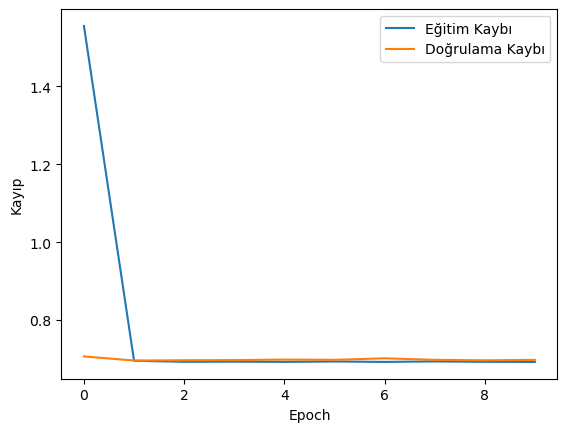

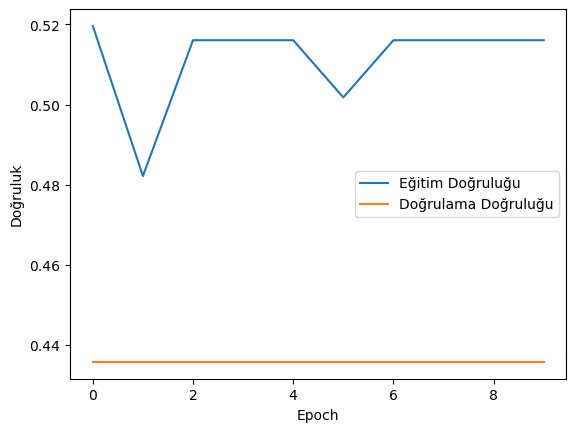

In [14]:
import matplotlib.pyplot as plt

# Eğitim ve doğrulama kaybı
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()
plt.show()

# Eğitim ve doğrulama doğruluğu
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.show()

In [15]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


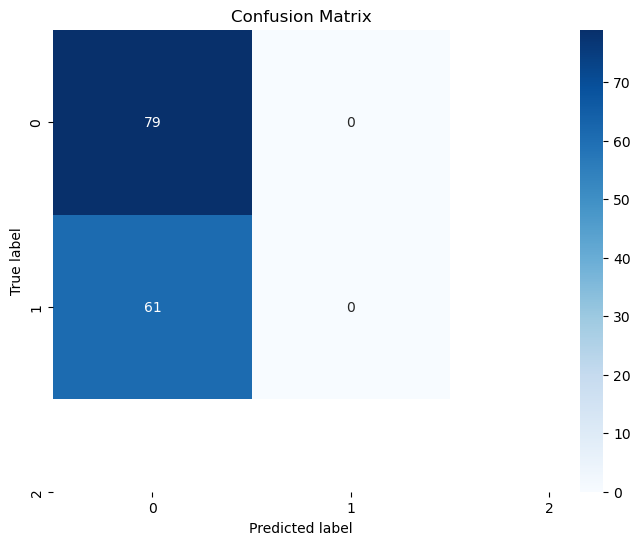

In [21]:
# Model tahminlerini yap
Y_pred = model.predict(X_test)

# Eğer Y_test zaten sınıf etiketleri içeriyorsa np.argmax kullanmaya gerek yok
Y_true = Y_test  # Eğer Y_test tek boyutlu ise

# Eğer Y_pred one-hot encoding formatında ise, sınıf etiketlerine dönüştürün
Y_pred_classes = np.argmax(Y_pred, axis=1)

# Confusion matrix hesaplama
from sklearn.metrics import confusion_matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# Confusion matrix'i çizme
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(confusion_mtx, classes=range(3))  # 3 sınıf varsa


In [23]:
from sklearn.metrics import classification_report
report = classification_report(Y_true, Y_pred_classes)
print(report)

              precision    recall  f1-score   support

           0       0.56      1.00      0.72        79
           1       0.00      0.00      0.00        61

    accuracy                           0.56       140
   macro avg       0.28      0.50      0.36       140
weighted avg       0.32      0.56      0.41       140



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [25]:
os.chdir(r"C:\Users\Administrator\Desktop\talha_kaya_221120241013\models")
model.save('model.h5')

In [26]:
# Modeli yükleyelim
loaded_model = tf.keras.models.load_model('model.h5')

# Yüklenen model ile test yapabiliriz
loaded_model.evaluate(X_test, Y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.4395 - loss: 0.6974


[0.6976522207260132, 0.4357142746448517]

In [27]:
from sklearn.preprocessing import LabelEncoder

# Etiketlerinizi (Y) string formatında yüklediğinizi varsayıyorum
encoder = LabelEncoder()

# Etiketleri 0 ve 1 şeklinde kodlayalım
Y_encoded = encoder.fit_transform(Y)

# Şimdi Y_encoded 0 ve 1 olarak kodlanmış olacak
print(Y_encoded[:10])  # İlk 10 etiketi kontrol edelim

[0 0 0 0 0 0 0 0 0 0]


In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ImageDataGenerator ile veri arttırım modelini kurgula ve datagen değişkenine ata
datagen = ImageDataGenerator(  
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180) 10 degrees
    zoom_range = 0.1,  # Randomly zoom image %10
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width) %10
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height) %10
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False  # randomly flip images
)
datagen.fit(X_train)  # datagen'i X_train üzerinden çalıştır ve veri üret


In [31]:

preds = model.predict(X_test)
y_pred = np.zeros_like(preds)
y_pred[np.arange(len(preds)), preds.argmax(1)] = 1
classes = ['cat','dog']
confusionMatrix = np.zeros((len(classes),len(classes)))

for i in range(len(Y_test)):

  if np.array_equal(y_pred[i],Y_test[i]):
    index = np.argmax(Y_test[i])
    confusionMatrix[index,index] += 1

  else:

    index1 = np.argmax(Y_test[i])
    index2 = np.argmax(y_pred[i])
    confusionMatrix[index1,index2] += 1

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        79
           1       0.44      1.00      0.61        61

    accuracy                           0.44       140
   macro avg       0.22      0.50      0.30       140
weighted avg       0.19      0.44      0.26       140

Accuracy Score : 
0.4357142857142857
--------------------------------------------------
Confusion Matrix : 
[[140.   0.]
 [  0.   0.]]
--------------------------------------------------


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


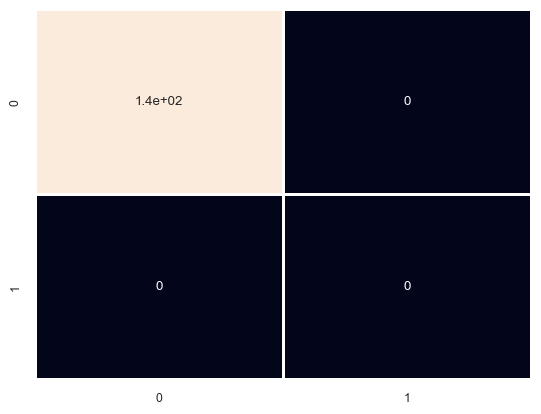

In [33]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
print("CLASSIFICATION REPORT")
print(classification_report(Y_test, y_pred))
print("Accuracy Score : ")
print(accuracy_score(Y_test, y_pred))
cm = accuracy_score(Y_test, y_pred)
sns.set(font_scale=0.8)
sns.heatmap(confusionMatrix,annot=True, linewidths=1.0, cbar=False)
print("--------------------------------------------------")
print("Confusion Matrix : ")
print(confusionMatrix)
print("--------------------------------------------------")

X_train şekli: (560, 224, 224, 3)
Y_train şekli: (560,)


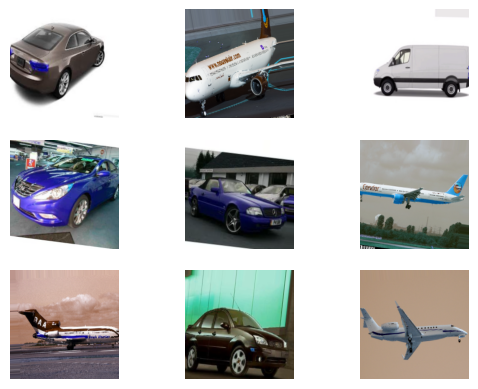

In [36]:
# Eğer verileriniz bir dosyadan yükleniyorsa, aşağıdaki gibi yükleyebilirsiniz:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from matplotlib import pyplot

	

# Verilerinizi kontrol edin (X_train ve Y_train'in tanımlı olması gerekiyor)
print(f"X_train şekli: {X_train.shape}")
print(f"Y_train şekli: {Y_train.shape}")

#ImageDataGenerator ile veri arttırım modelini kurgula ve datagen değikenine ata
datagen = ImageDataGenerator(  
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180) 10 degrees
        zoom_range = 0.1, # Randomly zoom image %10
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width) %10
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height) %10
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False  # randomly flip images
                        )
datagen.fit(X_train) #datagen'i x_train üzerinden çalıştır ve veri üret
# Veriye veri artırımı uygula (datagen'i X_train verisi ile fit et)
datagen.fit(X_train)

# Artırılmış resimlerden görüntüleme
# 9 adet örnek görseli rastgele oluştur
for X_batch, y_batch in datagen.flow(X_train, Y_train, batch_size=9):
    # 3x3 grid şeklinde görselleri oluştur
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        # Yeniden ölçeklenmiş görüntüleri 0-255 aralığına çeviriyoruz
        plt.imshow(X_batch[i] * 255)  # Resimleri tekrar 0-255 aralığına getirin
        plt.axis('off')  # Eksenleri kapatıyoruz
        
    plt.show()
    break  # 1 batch'i gösterdikten sonra döngüden çık




Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │        50,178 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,764,866 (56.32 MB)

 Trainable params: 50,178 (196.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

c:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 48s 3s/step - accuracy: 0.7557 - loss: 0.5653 - val_accuracy: 0.9786 - val_loss: 0.0384 - learning_rate: 0.0010
Epoch 2/5
 1/17 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.8750 - loss: 0.2181

c:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


17/17 ━━━━━━━━━━━━━━━━━━━━ 11s 564ms/step - accuracy: 0.8750 - loss: 0.2181 - val_accuracy: 0.9857 - val_loss: 0.0239 - learning_rate: 0.0010
Epoch 3/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 46s 3s/step - accuracy: 0.9988 - loss: 0.0201 - val_accuracy: 1.0000 - val_loss: 0.0096 - learning_rate: 0.0010
Epoch 4/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 13s 659ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 0.9929 - val_loss: 0.0142 - learning_rate: 0.0010
Epoch 5/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 46s 3s/step - accuracy: 1.0000 - loss: 0.0058 - val_accuracy: 0.9929 - val_loss: 0.0076 - learning_rate: 0.0010
x_test shape: (140, 224, 224, 3)
y_test shape: (140, 2)
5/5 - 10s - 2s/step - accuracy: 1.0000 - loss: 0.0033
Test Kaybı: 0.0032571693882346153
Test Başarısı: 1.0


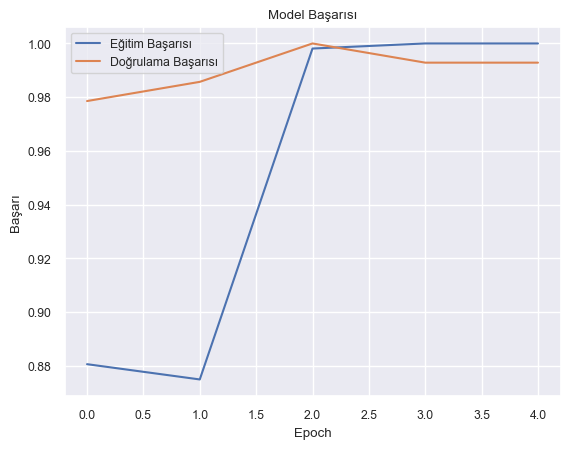

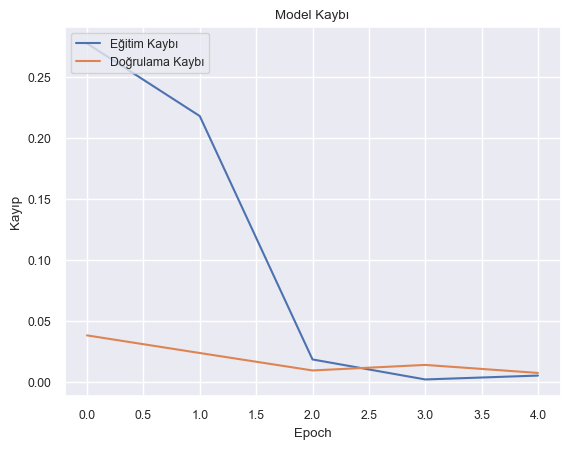

In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dropout, Dense
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Sınıf sayısı
NUM_CLASSES = 2  # Uçak ve Araba sınıfları

# Veri Yükleme ve Bölme
# X = np.array([...])  # Resim verisi (224x224x3)
# Y = np.array([...])  # Etiketler (0 veya 1)

# Eğitim ve doğrulama verilerini oluştur
x_train, x_validate, y_train, y_validate = train_test_split(X, Y, test_size=0.2, random_state=42)

# One-Hot Encoding yapalım
y_train = to_categorical(y_train, num_classes=NUM_CLASSES)
y_validate = to_categorical(y_validate, num_classes=NUM_CLASSES)

# VGG16 Modelini yükleme (top katman dahil değil)
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Yeni model oluşturma
model = Sequential([
    base_model,
    Flatten(),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')  # İki sınıf için softmax
])

# VGG16'nın önceden eğitilmiş katmanlarını dondurma
model.layers[0].trainable = False

# Modeli derleme
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Modelin özetini yazdırma
model.summary()

# Veri artırımı işlemleri
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)

# Eğitim verisi üzerinde veri artırımı
datagen.fit(x_train)

# Öğrenme oranını azaltma callback
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience=2, verbose=1, factor=0.5, min_lr=1e-6)

# Modeli eğitim verileri ile eğitme
history = model.fit(
    datagen.flow(np.array(x_train), np.array(y_train), batch_size=32),
    epochs=5,
    validation_data=datagen.flow(np.array(x_validate), np.array(y_validate), batch_size=32),
    verbose=1,
    steps_per_epoch=x_train.shape[0] // 32,
    callbacks=[learning_rate_reduction]
)

# Modeli test verisi ile değerlendirme
x_test = np.array(x_validate)  # Doğrulama verisini test verisi olarak kullanıyoruz
y_test = np.array(y_validate)

# Değerlendirme yapmadan önce şekil kontrolü
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

# Sonuçları yazdırma
print(f"Test Kaybı: {test_loss}")
print(f"Test Başarısı: {test_acc}")

# Eğitim sonucu başarı ve kayıp grafikleri
plt.plot(history.history['accuracy'], label='Eğitim Başarısı')
plt.plot(history.history['val_accuracy'], label='Doğrulama Başarısı')
plt.title('Model Başarısı')
plt.xlabel('Epoch')
plt.ylabel('Başarı')
plt.legend(loc='upper left')
plt.show()

plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Model Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend(loc='upper left')
plt.show()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │        50,178 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,764,866 (56.32 MB)

 Trainable params: 50,178 (196.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 47s 3s/step - accuracy: 0.6625 - loss: 0.9203 - val_accuracy: 0.9643 - val_loss: 0.0971 - learning_rate: 0.0010
Epoch 2/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 12s 610ms/step - accuracy: 0.9062 - loss: 0.1441 - val_accuracy: 0.9714 - val_loss: 0.0721 - learning_rate: 0.0010
Epoch 3/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 46s 3s/step - accuracy: 0.9972 - loss: 0.0193 - val_accuracy: 1.0000 - val_loss: 0.0091 - learning_rate: 0.0010
Epoch 4/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 13s 664ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.9929 - val_loss: 0.0135 - learning_rate: 0.0010
Epoch 5/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9984 - loss: 0.0067
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
17/17 ━━━━━━━━━━━━━━━━━━━━ 46s 3s/step - accuracy: 0.9984 - loss: 0.0067 - val_accuracy: 0.9929 - val_loss: 0.0165 - learning_rate: 0.0010
x_test shape: (140, 224, 224, 3)
y_test shape: (140, 2)
5/5 - 10s - 2s/step - accuracy: 1.0000 - loss

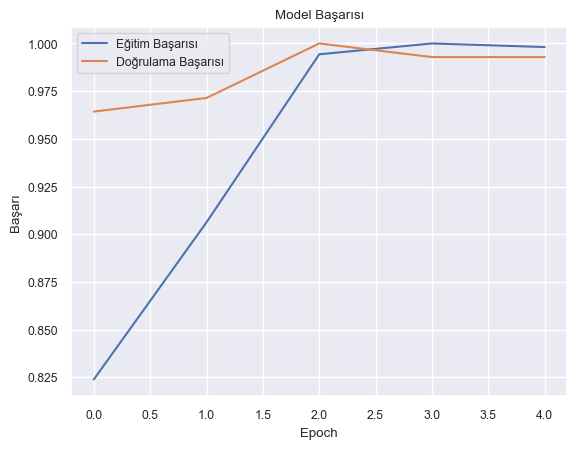

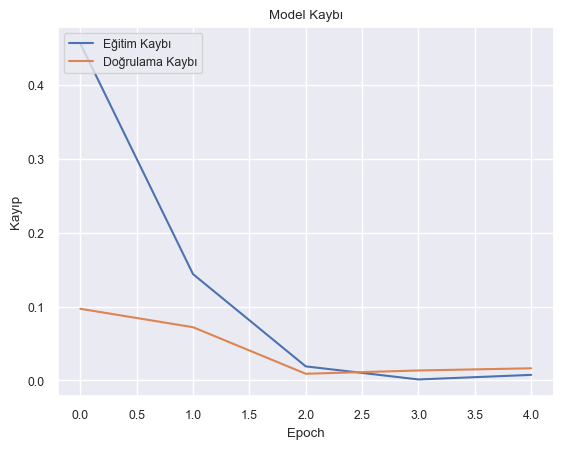

In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dropout, Dense
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Sınıf sayısı
NUM_CLASSES = 2  # Uçak ve Araba sınıfları

# Veri Yükleme ve Bölme
# X = np.array([...])  # Resim verisi (224x224x3)
# Y = np.array([...])  # Etiketler (0 veya 1)

# Eğitim ve doğrulama verilerini oluştur
x_train, x_validate, y_train, y_validate = train_test_split(X, Y, test_size=0.2, random_state=42)

# One-Hot Encoding yapalım
y_train = to_categorical(y_train, num_classes=NUM_CLASSES)
y_validate = to_categorical(y_validate, num_classes=NUM_CLASSES)

# VGG16 Modelini yükleme (top katman dahil değil)
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Yeni model oluşturma
model = Sequential([
    base_model,
    Flatten(),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')  # İki sınıf için softmax
])

# VGG16'nın önceden eğitilmiş katmanlarını dondurma
model.layers[0].trainable = False

# Modeli derleme
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Modelin özetini yazdırma
model.summary()

# Veri artırımı işlemleri
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)

# Eğitim verisi üzerinde veri artırımı
datagen.fit(x_train)

# Öğrenme oranını azaltma callback
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience=2, verbose=1, factor=0.5, min_lr=1e-6)

# Modeli eğitim verileri ile eğitme
history = model.fit(
    datagen.flow(np.array(x_train), np.array(y_train), batch_size=32),
    epochs=5,
    validation_data=datagen.flow(np.array(x_validate), np.array(y_validate), batch_size=32),
    verbose=1,
    steps_per_epoch=x_train.shape[0] // 32,
    callbacks=[learning_rate_reduction]
)

# Modeli test verisi ile değerlendirme
x_test = np.array(x_validate)  # Doğrulama verisini test verisi olarak kullanıyoruz
y_test = np.array(y_validate)

# Değerlendirme yapmadan önce şekil kontrolü
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

# Sonuçları yazdırma
print(f"Test Kaybı: {test_loss}")
print(f"Test Başarısı: {test_acc}")

# Eğitim sonucu başarı ve kayıp grafikleri
plt.plot(history.history['accuracy'], label='Eğitim Başarısı')
plt.plot(history.history['val_accuracy'], label='Doğrulama Başarısı')
plt.title('Model Başarısı')
plt.xlabel('Epoch')
plt.ylabel('Başarı')
plt.legend(loc='upper left')
plt.show()

plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Model Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend(loc='upper left')
plt.show()
